@ merge,Joining,Concatenating

In [1]:
import numpy as np
import pandas as pd

In [17]:
courses = pd.read_csv('courses.csv')
students = pd.read_csv('students.csv')
nov = pd.read_csv('reg-month1.csv')
dec = pd.read_csv('reg-month2.csv')

matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

- pd.concat()  -- it joins two dataframe in vertical
- ignore_index()
- multiindexing


In [18]:
pd.concat([nov,dec],ignore_index=True).head(5)
# by using concat we can merge two dataframe in vertical direction
# by using ignore_index we can adjust index

# concat is used widely

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9


In [19]:
# in above method we remove original index of dec 
# now we see how we can joins two dataframe by pretending that original index 

multi = pd.concat([nov,dec],keys=['Nov','Dec']) 
# by keys attribute we can prevent the original index
# this is called as multiindexing dataframe
multi.loc['Nov']
multi.loc['Dec']

# # to fetch the data
multi.loc[('Nov',0)]
multi.loc[('Dec',5)]

# # two join the dataframe in horzontally
info=pd.concat([nov,dec],axis=1,keys=['Nov','Dec'])
info.loc[(26)]
info
# we can also add two dataframe in horizontaly with diff shape

Nov                  Dec          
   student_id course_id student_id course_id
0        23.0       1.0          3         5
1        15.0       5.0         16         7
2        18.0       6.0         12        10
3        23.0       4.0         12         1
4        16.0       9.0         14         9
5        18.0       1.0          7         7
6         1.0       1.0          7         2
7         7.0       8.0         16         3
8        22.0       3.0         17        10
9        15.0       1.0         11         8
10       19.0       4.0         14         6
11        1.0       6.0         12         5
12        7.0      10.0         12         7
13       11.0       7.0         18         8
14       13.0       3.0          1        10
15       24.0       4.0          1         9
16       21.0       1.0          2         5
17       16.0       5.0          7         6
18       23.0       3.0         22         5
19       17.0       7.0         22         6
20       23.0       6.0         23         9
21       25.0       1.0         23         5
22       19.0       2.0         14         4
23       25.0      10.0         14         1
24        3.0       3.0         11        10
25        NaN       NaN         42         9
26        NaN       NaN         50         8
27        NaN       NaN         38         1

- Joins
    1) inner join
    2) left join
    3) right join
    4) outer join

* used to reduce required data to store perticular info

In [20]:
# inner join
reg = pd.concat([nov,dec])
reg.shape

students.merge(reg,how='inner',on='student_id').head(5)
# sequence is
# left_table.merge(right_table,how='Type_of_join,on='column_name)
# result mai vahi chije aayengi ho dohno table mai exist karti ho

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5


In [21]:
# left join
# left side whole + common from right table
courses.merge(reg,how='left',on='course_id').head(5)

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0


In [22]:
courses.merge(reg,how='right',on='course_id').head(5)

,course_id,course_name,price,student_id
0,1,python,2499,23
1,5,tableau,2499,15
2,6,power bi,1899,18
3,4,machine learning,9999,23
4,9,plotly,699,16


In [8]:
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['nitish','ankit','rahul'],
    'partner':[28,26,27]
})

students =pd.concat([students,temp_df],ignore_index=True)

In [9]:
students.tail(3)

,student_id,name,partner
25,26,nitish,28
26,27,ankit,26
27,28,rahul,27


In [23]:
# right join

students.merge(reg,how='right',on='student_id').head()

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9


- By inter changing name of table we can perform right join and left join 

Questions...

In [11]:
students.merge(reg,how='outer',on='student_id').tail(10)
# outer join gives all values which are present in it

,student_id,name,partner,course_id
53,23,Chhavi Lachman,18.0,5.0
54,24,Radhika Suri,17.0,4.0
55,25,Shashank D’Alia,2.0,1.0
56,25,Shashank D’Alia,2.0,10.0
57,26,nitish,28.0,NaN
58,27,ankit,26.0,NaN
59,28,rahul,27.0,NaN
60,38,NaN,NaN,1.0
61,42,NaN,NaN,9.0
62,50,NaN,NaN,8.0


# 99% we have to use inner join on given data

In [12]:
# 1. find total revenue generated
# inner join
total = reg.merge(courses,how='inner',on='course_id')['price'].sum()
total

np.int64(154247)

In [13]:
# find month by month revenue
temp_df = pd.concat([nov,dec],keys=['Nov','Dec']).reset_index()
temp_df.merge(courses,on='course_id').groupby('level_0')['price'].sum()

level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

In [14]:
# 3 print the registration table
# col -> name -> course -> price
reg.head(5)
data=reg.merge(students,how='inner',on='student_id')
data.merge(courses,how='inner',on='course_id')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,tableau,2499
2,Fardeen Mahabir,power bi,1899
3,Chhavi Lachman,machine learning,9999
4,Elias Dodiya,plotly,699
5,Fardeen Mahabir,python,2499
6,Kailash Harjo,python,2499
7,Tarun Thaker,pandas,1099
8,Yash Sethi,data analysis,4999
9,Preet Sha,python,2499


<Axes: ylabel='course_name'>

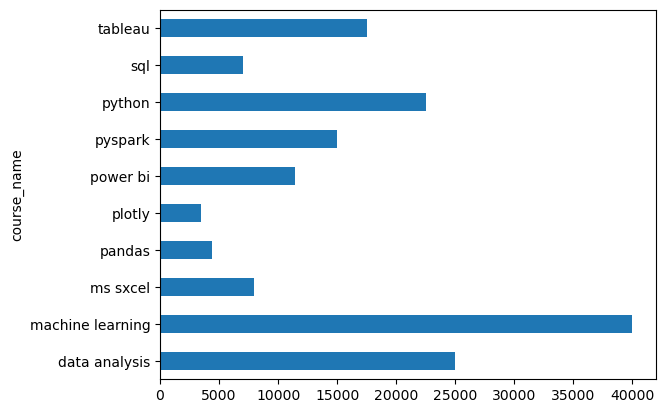

In [15]:
# 4. plot bar chart for revenue / course
courses
reg.merge(courses,how='inner',on='course_id').groupby('course_name')['price'].sum().plot(kind='barh')

In [26]:
# find students who enrolled in both the months

print(nov.merge(dec,how='inner',on='student_id').drop_duplicates('student_id').merge(students,how='inner',on='student_id')[['student_id','name']].set_index('student_id').sort_index())
common = np.intersect1d(nov['student_id'],dec['student_id'])
common
students[students['student_id'].isin(common)]

                          name
student_id                    
1                Kailash Harjo
3               Parveen Bhalla
7                 Tarun Thaker
11          David Mukhopadhyay
16                Elias Dodiya
17                Yasmin Palan
18             Fardeen Mahabir
22                  Yash Sethi
23              Chhavi Lachman


,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [38]:
# find course that got no enrollment
# ya sathi tumhi 
courses['course_id']
reg['course_id']

no_course = np.setdiff1d(courses['course_id'],reg['course_id'])
courses[courses['course_id'].isin(no_course)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [ ]:
# find students who did not enroll into any courses
# setsiff1d is used to finds A - B means A mai hai or B mai nahi hai 

students['student_id']
# courses['student_id']
students.head(5)
reg.head(5)

did_not_enroll = np.setdiff1d(students['student_id'],reg['student_id'])
x = students[students['student_id'].isin(did_not_enroll)].shape[0]
y = students.shape[0]

(x / y)*100
# 35.71% students did not enroll in any courses

35.714285714285715

In [ ]:
# print student name -> partner name for all enrolled students
data = pd.DataFrame({
    'id' : [1,2,3],
    'name' : ['nitish','ankit','rahul'],
    'partner' :[3,1,2]
})
data

# here we want self join
# self join is performed on same table
# but in pandas their is no self join attribute so we have 
# to use inner join but using attribute left_on and right_on
data.merge(data,how='inner',left_on='partner',right_on='id')[['name_x','name_y']]

,name_x,name_y
0,nitish,rahul
1,ankit,nitish
2,rahul,ankit


In [62]:
# find top 3 students with most number of enrollment
reg.merge(students,on='student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False)

student_id  name              
23          Chhavi Lachman        6
7           Tarun Thaker          5
1           Kailash Harjo         4
12          Radha Dutt            4
14          Pranab Natarajan      4
16          Elias Dodiya          4
11          David Mukhopadhyay    3
18          Fardeen Mahabir       3
22          Yash Sethi            3
15          Preet Sha             2
17          Yasmin Palan          2
19          Qabeel Raman          2
3           Parveen Bhalla        2
25          Shashank D’Alia       2
13          Munni Varghese        1
2           Esha Butala           1
21          Seema Kota            1
24          Radhika Suri          1
Name: name, dtype: int64

In [70]:
# find top 3 student who spent most amount of money on courses
reg.merge(students,on='student_id').merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False)

student_id  name              
23          Chhavi Lachman        22594
14          Pranab Natarajan      15096
19          Qabeel Raman          13498
7           Tarun Thaker          10595
24          Radhika Suri           9999
16          Elias Dodiya           9796
22          Yash Sethi             9397
12          Radha Dutt             9096
1           Kailash Harjo          7596
3           Parveen Bhalla         7498
18          Fardeen Mahabir        5497
11          David Mukhopadhyay     5197
13          Munni Varghese         4999
15          Preet Sha              4998
25          Shashank D’Alia        4998
17          Yasmin Palan           4098
2           Esha Butala            2499
21          Seema Kota             2499
Name: price, dtype: int64

In [73]:
# Alternative syntax
students.merge(reg,how='inner',on='student_id')
pd.merge(students,reg,how='inner',on='student_id').head(5)

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5


In [77]:
delivery.head(5)
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
# find top 3 stadiums with highest sixes / match ratio

temp_df = delivery.merge(matches,left_on='match_id',right_on='id')

# first we have to remove tha ball which doesnot consist 6 run
# for that we have to perform fitering on batsman_runs table
six_df = temp_df[temp_df['batsman_runs'] == 6]

# now we have too find ((stadium -> sixes))
num_sixes = six_df.groupby('venue')['venue'].count()

num_matches = matches['venue'].value_counts()

(num_sixes/num_matches).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64

In [96]:
# last question
# find orange cap holder of all the season (most runs in perticular season)
# pahili step merge data on the basis of match_id and id respective delivery and matches table

temp_df = delivery.merge(matches,left_on='match_id',right_on='id')
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
